<a href="https://colab.research.google.com/github/Jachmi03/lecture1/blob/regresja/pum4_regresja_todo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

zaczytanie niezbędnych bibliotek

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler

zaczytaj dane dotyczace sprzedazy

In [45]:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Salary Data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "rkiattisak/salaly-prediction-for-beginer",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-45-72cc2aa30810>:9: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:     Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


preprocessing

1.   sprawdż typy danych
2.   zmien etykiedy na zmienne liczbowe
3. w przypadku brakujacych danych uzupelnij (w przypadku etykiet) najczesciej wystepującą wartością lub średnią wartością



In [46]:
df.dtypes
df.head(10)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
5,29.0,Male,Bachelor's,Marketing Analyst,2.0,55000.0
6,42.0,Female,Master's,Product Manager,12.0,120000.0
7,31.0,Male,Bachelor's,Sales Manager,4.0,80000.0
8,26.0,Female,Bachelor's,Marketing Coordinator,1.0,45000.0
9,38.0,Male,PhD,Senior Scientist,10.0,110000.0


In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in df.columns:
  if df[column].dtype == object:
    df[column] = le.fit_transform(df[column])

df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


In [48]:
np.isnan(df).sum()

,0
Age,2
Gender,0
Education Level,0
Job Title,0
Years of Experience,2
Salary,2


In [49]:
if 'Salary' in df.columns:
  df['Salary'].fillna(df['Salary'].median(), inplace=True)

<ipython-input-49-df1efb188722>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Salary'].fillna(df['Salary'].median(), inplace=True)


In [50]:
if 'Years of Experience' in df.columns:
  df['Years of Experience'].fillna(df['Years of Experience'].median(), inplace=True)

<ipython-input-50-069a0a8a3d1c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Years of Experience'].fillna(df['Years of Experience'].median(), inplace=True)


In [51]:
if 'Age' in df.columns:
    df['Age'].fillna(df['Age'].median(), inplace=True)

<ipython-input-51-33badb1f1ff3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [53]:
np.isnan(df).sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  375 non-null    float64
 1   Gender               375 non-null    int64  
 2   Education Level      375 non-null    int64  
 3   Job Title            375 non-null    int64  
 4   Years of Experience  375 non-null    float64
 5   Salary               375 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 17.7 KB


Podziel zbiór danych na testowy i treningowy w stosunku 30/70

In [59]:
X = df.drop(columns=['Salary'])
y = df['Salary']

print("X =", X.shape)
print("y =", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("X_train =", X_train.shape)
print("y_train =", y_train.shape)
print("X_test =", X_test.shape)
print("y_test =", y_test.shape)

X = (375, 5)
y = (375,)
X_train = (262, 5)
y_train = (262,)
X_test = (113, 5)
y_test = (113,)


Stworz model regresji liniowej korzystajac z parametrów domyślnych
Przykład dokumentacji: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [69]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

ocen model na zbiorze testowym za pomocą miar: średni błąd kwadratowy, średni błąd absolutny, wynik wyjaśnionej wariancji

In [68]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"Mean absolute error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

Mean squared error: 242244768.41
Mean absolute error: 11561.48
Coefficient of determination: 0.89


spróbuj poprawić model, zacznij od danych, sprawdz korelacje, znormalizuj

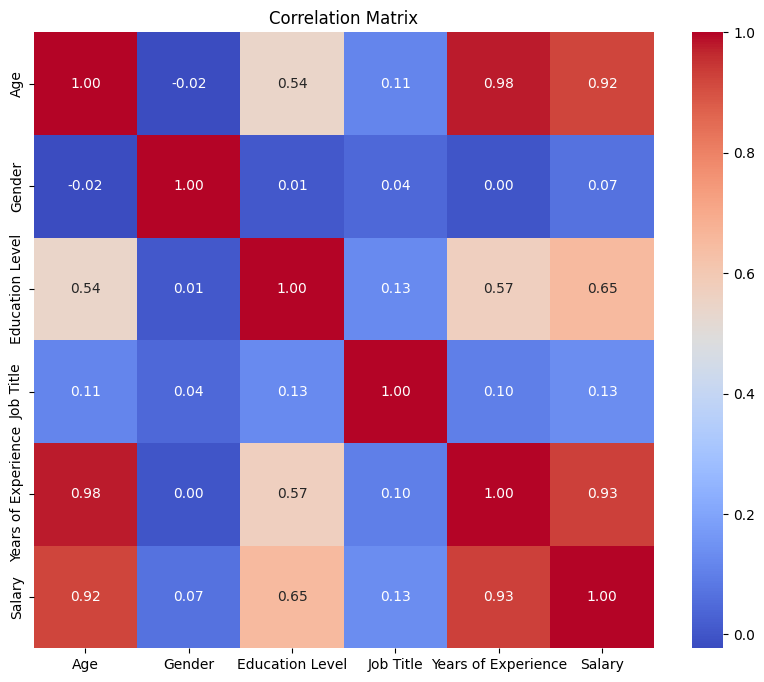

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [80]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Mean squared error (znormalizowane dane): {mean_squared_error(y_test, y_pred):.2f}")
print(f"Mean absolute error (znormalizowane dane): {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Coefficient of determination (znormalizowane dane): {r2_score(y_test, y_pred):.2f}")
print(f"Explained variance score (znormalizowane dane): {explained_variance_score(y_test, y_pred):.2f}")

Mean squared error (znormalizowane dane): 242244768.41
Mean absolute error (znormalizowane dane): 11561.48
Coefficient of determination (znormalizowane dane): 0.89
Explained variance score (znormalizowane dane): 0.89


Zbuduj model regresji odpornej i przetestuj jego predykcje

Wykreś przewidziane i faktyczne wartości obu modeli (przykład w dokumentacji: https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_regressor.html#sphx-glr-auto-examples-ensemble-plot-voting-regressor-py)

Mean squared error (robust): 231074127.92
Mean absolute error (robust): 11383.32
Coefficient of determination (robust): 0.90
Explained variance score (robust): 0.90


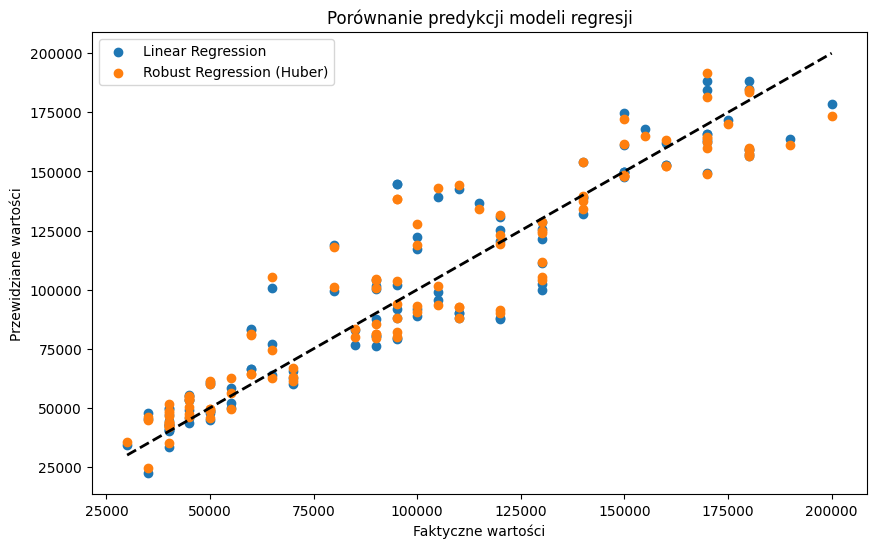

In [81]:
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor

robust_model = HuberRegressor()
robust_model.fit(X_train, y_train)

y_pred_robust = robust_model.predict(X_test)

print(f"Mean squared error (robust): {mean_squared_error(y_test, y_pred_robust):.2f}")
print(f"Mean absolute error (robust): {mean_absolute_error(y_test, y_pred_robust):.2f}")
print(f"Coefficient of determination (robust): {r2_score(y_test, y_pred_robust):.2f}")
print(f"Explained variance score (robust): {explained_variance_score(y_test, y_pred_robust):.2f}")


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.scatter(y_test, y_pred_robust, label='Robust Regression (Huber)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Faktyczne wartości')
plt.ylabel('Przewidziane wartości')
plt.title('Porównanie predykcji modeli regresji')
plt.legend()
plt.show()


Zmodyfikuj kod, zeby zwizualizować wynik lepszego z modeli

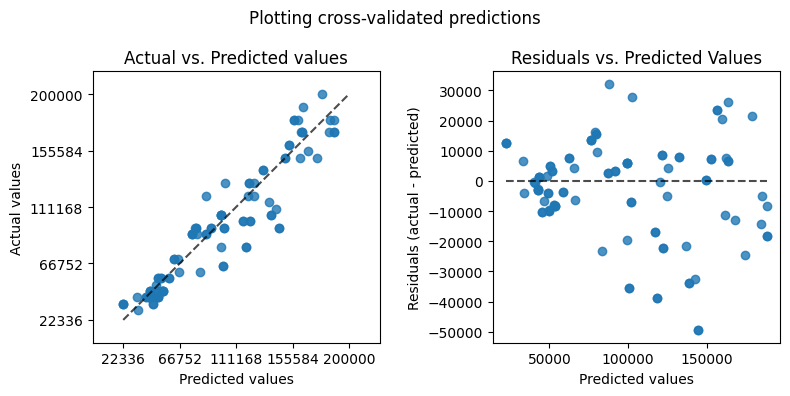

In [83]:
import matplotlib.pyplot as plt

from sklearn.metrics import PredictionErrorDisplay

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_test,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show()